# 第8章: 機械学習

<h3>目次</h3>

- [70. データの入手・整形](#prob70)
- [71. ストップワード](#prob71)
- [72. 素性抽出](#prob72)
- [73. 学習](#prob73)
- [74. 予測](#prob74)
- [75. 素性の重み](#prob75)
- [76. ラベル付け](#prob76)
- [77. 正解率の計測](#prob77)
- [78. 5分割交差検定](#prob78)
- [79. 適合率-再現率グラフの描画](#prob79)

<a name='prob70'>
# 70.データの入手・整形

文に関する極性分析の正解データを用い，以下の要領で正解データ（sentiment.txt）を作成せよ．<br>

rt-polarity.posの各行の先頭に"+1 "という文字列を追加する（極性ラベル"+1"とスペースに続けて肯定的な文の内容が続く）<br>
rt-polarity.negの各行の先頭に"-1 "という文字列を追加する（極性ラベル"-1"とスペースに続けて否定的な文の内容が続く）<br>
上述1と2の内容を結合（concatenate）し，行をランダムに並び替える<br>
sentiment.txtを作成したら，正例（肯定的な文）の数と負例（否定的な文）の数を確認せよ．

In [2]:
!mkdir data

In [4]:
!wget -NP ./data/ http://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz;\
tar zxvf ./data/rt-polaritydata.tar.gz -C ./data

--2018-08-17 13:38:40--  http://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz
www.cs.cornell.edu (www.cs.cornell.edu) をDNSに問いあわせています... 132.236.207.20
www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.20|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 487770 (476K) [application/x-gzip]
`./data/rt-polaritydata.tar.gz' に保存中

rt-polaritydata.tar 100%[===================>] 476.34K   273KB/s 時間 1.7s     

2018-08-17 13:38:43 (273 KB/s) - `./data/rt-polaritydata.tar.gz' へ保存完了 [487770/487770]

rt-polaritydata.README.1.0.txt
rt-polaritydata/rt-polarity.neg
rt-polaritydata/rt-polarity.pos


In [6]:
!cat ./data/rt-polaritydata/rt-polarity.pos 2>/dev/null | head

the rock is destined to be the 21st century's new " conan " and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal . 
the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson's expanded vision of j . r . r . tolkien's middle-earth . 
effective but too-tepid biopic
if you sometimes like to go to the movies to have fun , wasabi is a good place to start . 
emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't feel like one . 
the film provides some great insight into the neurotic mindset of all comics -- even those who have reached the absolute top of the game . 
offers that rare combination of entertainment and education . 
perhaps no picture ever made has more literally showed that the road to hell is paved with good intentions . 
steers turns in a snappy screenplay that curl

In [7]:
!cat ./data/rt-polaritydata/rt-polarity.neg 2>/dev/null | head

simplistic , silly and tedious . 
it's so laddish and juvenile , only teenage boys could possibly find it funny . 
exploitative and largely devoid of the depth or sophistication that would make watching such a graphic treatment of the crimes bearable . 
[garbus] discards the potential for pathological study , exhuming instead , the skewed melodrama of the circumstantial situation . 
a visually flashy but narratively opaque and emotionally vapid exercise in style and mystification . 
the story is also as unoriginal as they come , already having been recycled more times than i'd care to count . 
about the only thing to give the movie points for is bravado -- to take an entirely stale concept and push it through the audience's meat grinder one more time . 
not so much farcical as sour . 
unfortunately the story and the actors are served with a hack script . 
all the more disquieting for its relatively gore-free allusions to the serial murders , but it falls down in its attempts to humaniz

In [8]:
!mkdir work

In [15]:
with open('./data/rt-polaritydata/rt-polarity.pos', encoding='ISO-8859-1') as f, open('./work/rt-polarity_labeled.pos', 'w') as out:
    for line in f:
        print('+1', line.rstrip(), file=out)

In [16]:
with open('./data/rt-polaritydata/rt-polarity.neg', encoding='ISO-8859-1') as f, open('./work/rt-polarity_labeled.neg', 'w') as out:
    for line in f:
        print('-1', line.rstrip(), file=out)

In [1]:
import itertools, more_itertools

count_pos = 0
count_neg = 0
with open('./work/sentiment.txt', 'w') as out,\
open('./work/rt-polarity_labeled.pos') as pos, open('./work/rt-polarity_labeled.neg') as neg:
    sen_concat = itertools.chain((line for line in pos), (line for line in neg))
    for line in more_itertools.random_permutation(sen_concat):
        if line.startswith('+1'):
            count_pos += 1
        else: count_neg += 1
        print(line.rstrip(), file=out)
    
print('number of positive examples: {}, number of negative examples: {}'.format(count_pos, count_neg))

number of positive examples: 5331, number of negative examples: 5331


In [8]:
!head ./work/rt-polarity_labeled.pos

+1 the rock is destined to be the 21st century's new " conan " and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .
+1 the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson's expanded vision of j . r . r . tolkien's middle-earth .
+1 effective but too-tepid biopic
+1 if you sometimes like to go to the movies to have fun , wasabi is a good place to start .
+1 emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't feel like one .
+1 the film provides some great insight into the neurotic mindset of all comics -- even those who have reached the absolute top of the game .
+1 offers that rare combination of entertainment and education .
+1 perhaps no picture ever made has more literally showed that the road to hell is paved with good intentions .
+1 steers turns in a snappy 

<a name='prob71'>
# 71. ストップワード

英語のストップワードのリスト（ストップリスト）を適当に作成せよ．<br>
さらに，引数に与えられた単語（文字列）がストップリストに含まれている場合は真，それ以外は偽を返す関数を実装せよ．<br>
さらに，その関数に対するテストを記述せよ．

- pytestコマンド

testで始まるモジュールのtestで始まる関数を実行

<h4>ストップワードとは?</h4>
情報検索において検索語として利用する可能性がないためあらかじめ検索語から除いておくような語 -> 
- 前置詞, 接続詞, 代名詞, 冠詞(文法関係の機能語)
- 一般的すぎる語

<a href = 'https://www.ranks.nl/stopwords'>プログラムに用いたストップワードのリスト</a>

In [2]:
import requests
from bs4 import BeautifulSoup, NavigableString

In [3]:
res = requests.get('https://www.ranks.nl/stopwords', verify=False)
soup = BeautifulSoup(res.text)

/Users/r-fujii/.pyenv/versions/anaconda3-5.0.1/lib/python3.7/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [4]:
table = soup.find_all('table')
cols = table[0].find_all('td')

In [5]:
stopwords_en = []

for col in cols:
    for w in col.childGenerator():
        print(w)
        if w.__class__ == NavigableString:
            stopwords_en.append(w)

with open('./work/stopwords_en.txt', 'w') as f:
    for word in stopwords_en:
        f.write(word + '\n')

a
<br/>
about
<br/>
above
<br/>
after
<br/>
again
<br/>
against
<br/>
all
<br/>
am
<br/>
an
<br/>
and
<br/>
any
<br/>
are
<br/>
aren't
<br/>
as
<br/>
at
<br/>
be
<br/>
because
<br/>
been
<br/>
before
<br/>
being
<br/>
below
<br/>
between
<br/>
both
<br/>
but
<br/>
by
<br/>
can't
<br/>
cannot
<br/>
could
<br/>
couldn't
<br/>
did
<br/>
didn't
<br/>
do
<br/>
does
<br/>
doesn't
<br/>
doing
<br/>
don't
<br/>
down
<br/>
during
<br/>
each
<br/>
few
<br/>
for
<br/>
from
<br/>
further
<br/>
had
<br/>
hadn't
<br/>
has
<br/>
hasn't
<br/>
have
<br/>
haven't
<br/>
having
<br/>
he
<br/>
he'd
<br/>
he'll
<br/>
he's
<br/>
her
<br/>
here
<br/>
here's
<br/>
hers
<br/>
herself
<br/>
him
<br/>
himself
<br/>
his
<br/>
how
<br/>
how's
<br/>
i
<br/>
i'd
<br/>
i'll
<br/>
i'm
<br/>
i've
<br/>
if
<br/>
in
<br/>
into
<br/>
is
<br/>
isn't
<br/>
it
<br/>
it's
<br/>
its
<br/>
itself
<br/>
let's
<br/>
me
<br/>
more
<br/>
most
<br/>
mustn't
<br/>
my
<br/>
myself
<br/>
no
<br/>
nor
<br/>
not
<br/>
of
<br/>
off
<br/>
o

In [9]:
!wc -l work/stopwords_en.txt

348 work/stopwords_en.txt


In [2]:
%%file ./src/testfunc_is_stop_word.py
#!/usr/bin/env python3
import unittest

class Test(unittest.TestCase):
    def testfunc_is_stopword(self):
        self.assertTrue(is_stopword('in'))
        self.assertFalse(is_stopword('play'))


with open('./work/stopwords_en.txt') as f:
    stopwords_en = [word.rstrip() for word in f]   

def is_stopword(word):
    return True if word in stopwords_en else False


if __name__ == '__main__':
    unittest.main()

Overwriting ./src/testfunc_is_stop_word.py


In [3]:
!chmod +x ./src/testfunc_is_stop_word.py

In [4]:
!./src/testfunc_is_stop_word.py

.
----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


<a name='prob72'>
# 72. 素性抽出

極性分析に有用そうな素性を各自で設計し，学習データから素性を抽出せよ．<br>
素性としては，レビューからストップワードを除去し，各単語をステミング処理したものが最低限のベースラインとなるであろう．

In [127]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

<h4>ベースライン</h4>

Counter -> DictVectorizerよりCountVectorizer使う方が早いらしい

In [10]:
from nltk import stem

def make_dataset(fname):
    
    stemmer = stem.PorterStemmer()
    with open('./work/stopwords_en.txt') as f:
        stopwords_en = [word.rstrip() for word in f]
    
    with open(fname) as f:
        for line in f:
            pol, text = line.split(maxsplit=1)
            # 1文中のstopwordではない語をstemmingして連結
            seq = ' '.join(stemmer.stem(w) for w in text.rstrip().split() if w not in stopwords_en)
            
            yield seq, pol

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

CV = CountVectorizer()
X = CV.fit_transform(seq for seq, pol in make_dataset('./work/sentiment.txt'))
ylabel = np.array([pol for seq, pol in make_dataset('./work/sentiment.txt')]).astype(np.int32)
features = CV.get_feature_names()

print(X.shape)
print(X.toarray())
print(features[:10])

(10662, 13376)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['00', '000', '007', '10', '100', '101', '102', '103', '104', '105']


In [12]:
print(ylabel)
print(len(ylabel))

[-1 -1  1 ...  1 -1 -1]
10662


素性の数が13376...

**if ... in ... 等よりもfilterを使うとスマートに書ける**

- 素性の数を削りつつも同等のパフォーマンスが出せないか??

<h4>1. 分類のキーになりそうな品詞のみ使う -> 後の問題で重みが高かったもの(形容詞, 副詞) + 間投詞, punct</h4>
これはあんまりよくなかった

In [247]:
from nltk import pos_tag, word_tokenize

In [249]:
def tag_analyzer(string):
    
    tagset = ('JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS', 'UH', '.')
    stemmer = stem.PorterStemmer()
    return [stemmer.stem(word) for word, pos in pos_tag(word_tokenize(string)) if pos in tagset]

In [250]:
CV_tag = CountVectorizer(analyzer=tag_analyzer)
X_tag = CV_tag.fit_transform(seq for seq, pol in make_dataset('./work/sentiment.txt'))
ylabel = np.array([pol for seq, pol in make_dataset('./work/sentiment.txt')]).astype(np.int32)
features = CV_tag.get_feature_names()

print(X_tag.shape)
print(X_tag.toarray())
print(features[:10])

(10662, 6922)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['!', "'60s-homag", "'a", "'altern", "'artist", "'best", "'black", "'blue", "'charli", "'cherish"]


<h4>2. TfidfVectorizerで語の重要度に基づいた素性を作る + bi-gram featureの導入, feature数をかなり制限</h4>

In [251]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [260]:
TfV = TfidfVectorizer(ngram_range=(1,2), max_features=3000)
X_rev = TfV.fit_transform(seq for seq, pol in make_dataset('./work/sentiment.txt'))
ylabel = np.array([pol for seq, pol in make_dataset('./work/sentiment.txt')]).astype(np.int32)
features = TfV.get_feature_names()

print(X_rev.shape)
print(X_rev.toarray())
print(features[:10])

(10662, 3000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['10', '10 minut', '100', '11', '12', '13', '15', '19', '20', '2002']


<a name='prob73'>
# 73. 学習

72で抽出した素性を用いて，ロジスティック回帰モデルを学習せよ．

学習用とテスト用にデータを分割
- sklearn.model_selection.train_test_split</br>
引数random_stateに乱数シードを与える(再現性の問題)

<h4>ベースライン</h4>

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, ylabel, test_size=0.1, random_state=0)
lr = LogisticRegression(random_state=0)
lr.fit(X_train.toarray(), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
X_train.shape[0] == y_train.shape[0]

True

In [7]:
X_train.shape[1] == X.shape[1]

True

<h4>2.のやつ</h4>

$C$=$\frac{1}{\lambda}$ -> 正規化係数lambdaが大きいとデータの少しの揺らぎには影響されにくくなる -> 汎化性能が上がる / lambdaが小さいと重みが大きくなりがち -> よりtraining dataにはfit

In [265]:
X_train_rev, X_test_rev, y_train, y_test = train_test_split(X_rev, ylabel, test_size=0.1, random_state=0)
lr_rev = LogisticRegression(random_state=0, C=0.9)
lr_rev.fit(X_train_rev.toarray(), y_train)

LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<a name='prob74'>
# 74. 予測

73で学習したロジスティック回帰モデルを用い，与えられた文の極性ラベル（正例なら"+1"，負例なら"-1"）と，その予測確率を計算するプログラムを実装せよ．

<h4>ベースライン</h4>

In [8]:
def pred_label(sentence, cv:CountVectorizer, lr:LogisticRegression):
    X = cv.transform(sentence)
    label = lr.predict(X)[0]
    prob = np.max(lr.predict_proba(X), axis=1)[0]
    return '予測ラベル:{}, 予測確率:{}'.format(label, prob)

In [9]:
test_neg = ['simplistic , silly and tedious .']
test_pos = ['the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .']
print(pred_label(test_neg, CV, lr))
print(pred_label(test_pos, CV, lr))

予測ラベル:-1, 予測確率:0.6052118347281297
予測ラベル:1, 予測確率:0.8640079475525666


<a name='prob75'>
# 75. 素性の重み

73で学習したロジスティック回帰モデルの中で，重みの高い素性トップ10と，重みの低い素性トップ10を確認せよ．

<h4>ベースライン</h4>

In [10]:
idx_w_rank = np.argsort(lr.coef_[0])[::-1]

重み1位のindexと重み

In [11]:
print('idx:{}, weight:{}'.format(idx_w_rank[0], lr.coef_[0][idx_w_rank[0]]))

idx:3868, weight:2.091319473927551


↓ 教師データの型指定をしなかった場合にはネガティブな語の重みが正になるように学習された...ラベルがintじゃないときには教師データの先に出てきた方のラベルが正になるのかもしれない

In [13]:
idx_w_top10 = idx_w_rank[:10]
idx_w_worst10 = idx_w_rank[::-1][:10]

print('Top10:')
for i, v in enumerate(idx_w_top10, start=1):
    print('Top{} feature:{}, weight:{}'.format(i, features[v], lr.coef_[0][v]))

print('Worst10:')
for i, v in enumerate(idx_w_worst10, start=1):
    print('Worst{} feature:{}, weight:{}'.format(i, features[v], lr.coef_[0][v]))

Top10:
Top1 feature:engross, weight:2.091319473927551
Top2 feature:refresh, weight:1.9473297048576608
Top3 feature:unexpect, weight:1.7758357637175628
Top4 feature:marvel, weight:1.7341953888166433
Top5 feature:resist, weight:1.6936911225376976
Top6 feature:smarter, weight:1.6535320870662475
Top7 feature:comfort, weight:1.6386789074659236
Top8 feature:warm, weight:1.6288718001319096
Top9 feature:remark, weight:1.6270403739833512
Top10 feature:solid, weight:1.586225009442439
Worst10:
Worst1 feature:bore, weight:-2.116005658243827
Worst2 feature:dull, weight:-2.000369206245822
Worst3 feature:fail, weight:-1.791940138812256
Worst4 feature:neither, weight:-1.7862470997539772
Worst5 feature:mediocr, weight:-1.7430952487758546
Worst6 feature:junk, weight:-1.7022114402167012
Worst7 feature:plod, weight:-1.6716314221261592
Worst8 feature:badli, weight:-1.6168982108900956
Worst9 feature:routin, weight:-1.6028766515782666
Worst10 feature:bland, weight:-1.5980099647007793


<a name='prob76'>
# 76. ラベル付け

**学習データに対して**ロジスティック回帰モデルを適用し，正解のラベル，予測されたラベル，予測確率をタブ区切り形式で出力せよ．

<h4>ベースライン</h4>

- train dataでの精度

In [14]:
import itertools

def get_result_table(X, y, lr:LogisticRegression):
    label = lr.predict(X)
    prob = np.max(lr.predict_proba(X), axis=1)

    for cor, pred, pred_prob in zip(y, label, prob):
        yield cor, pred, pred_prob

In [15]:
for cor, pred, pred_prob in itertools.islice(get_result_table(X_train, y_train, lr), 10):
    print('{}\t{}\t{}'.format(cor, pred, pred_prob))

1	1	0.7308438602101379
-1	-1	0.771345163747875
-1	-1	0.7188460903595768
1	1	0.7983573567984854
-1	-1	0.6886476895011939
-1	-1	0.9778462810482675
-1	-1	0.9636143465948221
-1	-1	0.8846569839067747
1	-1	0.7692389050491047
1	1	0.7621512395791971


<h4>2.のやつ</h4>

In [266]:
label = lr_rev.predict(X_train_rev)
prob = np.max(lr_rev.predict_proba(X_train_rev), axis=1)

for cor, pred, pred_prob in itertools.islice(zip(y_train, label, prob), 10):
    print(cor, pred, pred_prob, sep='\t')

1	1	0.6061920360725934
-1	-1	0.6166340965255432
-1	1	0.5567253668090474
1	1	0.7172414492717472
-1	-1	0.6496702172104625
-1	-1	0.863998397204088
-1	-1	0.8336191732977347
-1	-1	0.7607975909779756
1	-1	0.8286353231753999
1	1	0.6383494657594139


<h4>pandasで</h4>

In [16]:
import pandas as pd

In [18]:
label = lr.predict(X_train)
prob = np.max(lr.predict_proba(X_train), axis=1)

pd.set_option('display.max_rows', 10)
df = pd.DataFrame(y_train, columns=['正解'])
df['予測値'] =  pd.Series(label)
df['正誤'] = pd.Series(y_train == label)
df['予測確率'] = pd.Series(prob)

df

,正解,予測値,正誤,予測確率
0,1,1,True,0.730844
1,-1,-1,True,0.771345
2,-1,-1,True,0.718846
3,1,1,True,0.798357
4,-1,-1,True,0.688648
...,...,...,...,...
9590,1,1,True,0.723292
9591,1,1,True,0.968374
9592,-1,-1,True,0.652382
9593,1,1,True,0.787856


In [19]:
print(lr.score(X_train, y_train))

0.9503908285565399


In [267]:
print(lr_rev.score(X_train_rev, y_train))

0.8400208441896821


<h4>異常にoverfitしてる, というかbaseline強い</h4>

- test dataでの精度

In [20]:
print(lr.score(X_test, y_test))

0.753514526710403


素性の数を3000まで減らしてもパフォーマンス向上 -> Tf-idfで重要な語にfocusできている?

In [269]:
print(lr_rev.score(X_test_rev, y_test))

0.7703842549203374


<a name='prob77'>
# 77. 正解率の計測

76の出力を受け取り，予測の正解率，正例に関する適合率，再現率，F1スコアを求めるプログラムを作成せよ．

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calc_score(cor, pred):
    acc = accuracy_score(cor, pred)
    prec = precision_score(cor, pred)
    rec = recall_score(cor, pred)
    F1 = f1_score(cor, pred)
    
    return acc, prec, rec, F1

In [24]:
# 一回zipして各データに対する正解, 予測...にした後に正解の配列, 予測の配列...を作り直してて頭悪い
cor = [cor for cor, *_ in get_result_table(X_train, y_train, lr)]
pred = [pred for _, pred, _ in get_result_table(X_train, y_train, lr)]

acc, prec, rec, F1 = calc_score(cor, pred)
print('accuracy:{}, precision:{}, recall:{}, F1:{}'.format(acc, prec, rec, F1))

accuracy:0.9503908285565399, precision:0.9542415378186377, recall:0.9467247097844113, F1:0.950468262226847


<a name='prob78'>
# 78. 5分割交差検定

76-77の実験では，学習に用いた事例を評価にも用いたため，正当な評価とは言えない．<br>
すなわち，分類器が訓練事例を丸暗記する際の性能を評価しており，モデルの汎化性能を測定していない．<br>
そこで，5分割交差検定により，極性分類の正解率，適合率，再現率，F1スコアを求めよ．

<h2>そもそも訓練事例をテストにも使うとかいうぶっ飛び設定だった</h2>

- $k$-分割交差検証<br>
標本を$k$個に分割してそのうち1個をテスト事例, 残り$k-1$個を訓練事例として, $k$個の標本群それぞれをテスト事例にして$k$回の検証を行う手法<br>
$k$回の結果の平均を推定値とする

クラス分類では通常層化$k$-分割交差検証が行われる -> 元のデータと各クラスに属するインスタンスの割合が同じになるように分割

cross_val_scoreはscoringにstringしか渡せないけどcross_validateはリストで渡せる -> そっち使おう

In [27]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

lr_5cross = LogisticRegression(random_state=0)
kfold = StratifiedKFold(n_splits=5, random_state=0)
acc_5cross = np.mean(cross_val_score(lr_5cross, X, ylabel, scoring='accuracy', cv=kfold))
prec_5cross = np.mean(cross_val_score(lr_5cross, X, ylabel, scoring='precision', cv=kfold))
rec_5cross = np.mean(cross_val_score(lr_5cross, X, ylabel, scoring='recall', cv=kfold))
F1_5cross = np.mean(cross_val_score(lr_5cross, X, ylabel, scoring='f1', cv=kfold))

In [28]:
print('accuracy:{}, precision:{}, recall:{}, F1:{}'.format(acc_5cross, prec_5cross, rec_5cross, F1_5cross))

accuracy:0.7492959517224038, precision:0.749908095451498, recall:0.7484495640140598, F1:0.7491027521766396


<a name='prob79'>
# 79. 適合率-再現率グラフの描画

ロジスティック回帰モデルの分類の閾値を変化させることで，適合率-再現率グラフを描画せよ．

- Precision-Recall curve<br>
ラベルが+1に分類される分類確率のthresholdを変化させたときのprecision, recall値

1. 閾値が非常に高いと -> 左上 -> 確かに正しいものを選べてはいるけど, 正解ラベル中のほとんどは見逃してしまう
2. 閾値が低いと -> 右下 -> すべてを+1に分類するからすべての正例を選べるけど, precisionは正例数/訓練データ数

In [115]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict_proba(X_test)[:,1]

prec, rec, threshold = precision_recall_curve(y_test, y_pred)

In [121]:
print(prec[len(threshold)-1])

1.0


In [122]:
print(rec[len(threshold)-1])

0.0019723865877712033


In [116]:
print(prec[0])

0.4970588235294118


In [117]:
print(rec[0])

1.0


Text(0.5,1,'2-class Precision-Recall curve')

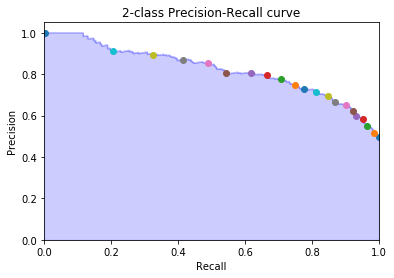

In [120]:
%matplotlib inline
plt.step(rec, prec, color='b', alpha=0.2, where='mid')
plt.fill_between(rec, prec, step='mid', alpha=0.2, color='b')

for i in range(21):
    # threshold=0.05刻みでのprec, recの値
    close_point = np.argmin(np.abs(threshold - (i/20)))
    plt.plot(rec[close_point], prec[close_point], 'o')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')